In [1]:
import pandas as pd
import numpy as np
from glob import glob
import tskit
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/terracotta")
import terracotta as tct
import importlib
importlib.reload(tct)
import time
import emcee


directory = "."

demes = pd.read_csv(f"{directory}/demes_elev_two_type.tsv", sep="\t")

#demes["type"] = 0 #ignoring elevation type

samples = pd.read_csv(f"{directory}/samples_elev_two_type.tsv", sep="\t")

world_map = tct.WorldMap(demes, samples)

trees = [tct.nx_bin_ts(tskit.load(ts).simplify(), [0, 10, 100, 1000, 10000, 100000, 1000000, 10000000]).first() for ts in glob(f"{directory}/trees/*")]

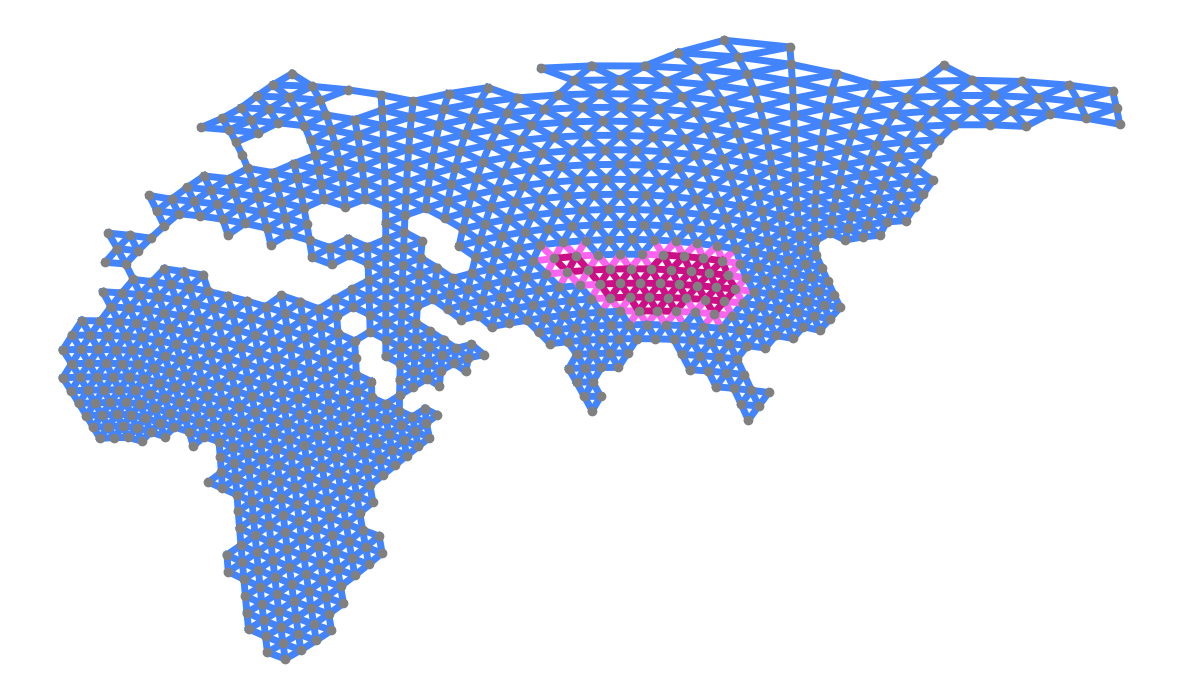

In [2]:
world_map.draw(figsize=(15,15), color_connections=True)

In [ ]:
[1.80528077e-02 4.17917210e-04 1.87046741e-06]

In [ ]:
nwalkers = 10
niter = 1000
initial_mr = np.array([np.random.uniform(0, 0.1) for connection_type in world_map.connections.type.unique()])
ndim = len(initial_mr)
p0 = [np.array(initial_mr) + 0.01 * np.random.randn(ndim) for i in range(nwalkers)]
sampler, pos, prob, state = tct.mcmc.run(p0, nwalkers, niter, world_map, trees[:10], save_to="store_mcmc_elev_two_type.h5")

samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]
print(theta_max)

[0.08696279 0.02827539 0.09942632] -124612.96343955214
[0.104578   0.0316488  0.09547764] -124924.96930769914


In [2]:
new_backend = emcee.backends.HDFBackend("store_mcmc_elev_two_type.h5")
print("Initial size: {0}".format(new_backend.iteration))

Initial size: 256


In [ ]:
nwalkers = 10
niter = 1000
initial_mr = np.array([np.random.uniform(0, 0.1) for connection_type in world_map.connections.type.unique()])
ndim = len(initial_mr)
sampler = emcee.EnsembleSampler(nwalkers, ndim, tct.mcmc.lnprob, backend=new_backend, args=[world_map, trees[:10]])
pos, prob, state = sampler.run_mcmc(None, niter)

[2.66794925e-02 1.11814808e-04 1.54376543e-06] -120070.23030134369
[2.71971370e-02 1.10898987e-04 9.97050785e-06] -120196.46257604597
[2.71139974e-02 7.80659199e-05 1.13468213e-05] -120341.14527046678
[2.78410215e-02 4.04242964e-04 1.01174894e-05] -120733.2708294679
[2.50155495e-02 1.18908744e-04 1.86443695e-05] -120366.33804793858
[2.69280230e-02 1.07933527e-04 2.73706728e-06] -120080.49742618625
[2.75391066e-02 2.49359435e-04 1.27608439e-05] -120743.07573143812
[2.57751159e-02 1.04020125e-04 9.02175028e-06] -120192.23296047167
[2.63778881e-02 4.02420490e-05 6.07443208e-06] -121291.19835179992
[2.70902488e-02 1.10111144e-04 4.21529876e-06] -120106.66176193075
[2.67931238e-02 1.48017096e-04 8.80744315e-06] -120345.13644210555
[2.67911080e-02 9.94403413e-05 9.90266745e-06] -120194.73218855179
[2.59390892e-02 1.20983934e-04 1.76328943e-05] -120342.57191287506
[2.75319859e-02 1.07517999e-04 8.85237051e-06] -120172.58538369322
[2.61463491e-02 1.07117702e-04 5.86979950e-06] -120139.41049005

In [12]:
directory = "."

demes = pd.read_csv(f"{directory}/demes.tsv", sep="\t")

demes["type"] = 0 #ignoring elevation type

samples = pd.read_csv(f"{directory}/samples.tsv", sep="\t")

world_map = tct.WorldMap(demes, samples)

trees = [tct.nx_bin_ts(tskit.load(ts).simplify(), [0, 10, 100, 1000, 10000, 100000, 1000000, 10000000]).first() for ts in glob(f"{directory}/trees/*")]

print(tct.calc_migration_rate_log_likelihood(
    world_map=world_map,
    trees=trees[:10],
    migration_rates={0:0.021673}
))

(np.float64(-122281.34762001842), [np.float64(-12463.464108038586), np.float64(-11947.138328039407), np.float64(-12349.238024449125), np.float64(-12589.599862102144), np.float64(-11807.158352128963), np.float64(-12218.375911967009), np.float64(-11918.998919923077), np.float64(-12397.000071578374), np.float64(-12350.006313121745), np.float64(-12240.367728669997)])


In [2]:
nwalkers = 5
niter = 1000
initial_mr = np.array([0.1 for connection_type in world_map.connections.type.unique()])
ndim = len(initial_mr)
p0 = [np.array(initial_mr) + 1e-2 * np.random.randn(ndim) for i in range(nwalkers)]
sampler, pos, prob, state = tct.mcmc.run(p0, nwalkers, niter, world_map, trees[:10])

samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]
print(theta_max)

Running burn-in...
[0.11168659] -125098.21610135106
[0.10610651] -125019.53141696191
[0.09810736] -124892.14729587601
[0.08320563] -124595.76384105365
[0.10282303] -124969.49170997804
[0.10126268] -124944.6455499015
[0.09700076] -124872.98388746977
[0.08720616] -124684.1486512029
[0.11372992] -125125.22202249058
[0.10264739] -124966.73031303418
[0.11187923] -125100.80129808612
[0.1097804] -125072.17988884743
[0.11990959] -125201.74035136259
[0.09869818] -124902.21538227127
[0.08002678] -124520.1945147486
[0.10897264] -125060.89014045696
[0.06946399] -124229.9748592584
[0.10280115] -124969.14824709453
[0.10171352] -124951.89784474687
[0.09759535] -124883.33074247417
[0.10471881] -124998.74302807525
[0.05740309] -123809.61860530224
[0.10393288] -124986.7380624683
[0.10603495] -125018.47186746151
[0.09520174] -124840.95205756261
[0.1018724] -124954.43931746052
[0.07017849] -124251.69905833398
[0.10264411] -124966.67863896005
[0.09199101] -124780.93822839597
[0.09215531] -124784.1016468770

Traceback (most recent call last):
  File "/opt/anaconda3/envs/terracotta/lib/python3.12/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/mcmc.py", line 16, in lnprob
    prob = lp + calc_migration_rate_log_likelihood(
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/main.py", line 351, in calc_migration_rate_log_likelihood
    log_likelihoods.append(_calc_tree_log_likelihood(tree, world_map.sample_location_vectors, precomputed_transitions=precomputed_transitions)[0])
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/main.py", line 305, in _calc_tree_log_likelihood
    outgoing_log_message 

In [ ]:
(np.float64(-142271.5255700355), [np.float64(-14290.465194544497), np.float64(-15022.875131797971), np.float64(-14490.602320919128), np.float64(-14460.577917081337), np.float64(-13910.410324397868), np.float64(-13929.525475648148), np.float64(-13865.883020064473), np.float64(-14125.402244995596), np.float64(-14333.533580780613), np.float64(-13842.250359805877)])

In [2]:
trees = [tskit.load(ts).first() for ts in glob(f"{directory}/trees/*")]


start = time.time()
print(tct.calc_migration_rate_log_likelihood(
    world_map=world_map,
    trees=trees,
    migration_rates={0:0.1}
)[0])
print(time.time() - start)

{0: 0.1}
Precalculating transitions...
Calculating loglikelihoods per tree...
-8801.319494128338
176.68037605285645


In [ ]:
-8801.319494128338
178.43316984176636

In [ ]:
nwalkers = 5
niter = 1000
initial_mr = np.array([0.1 for connection_type in world_map.connections.type.unique()])
ndim = len(initial_mr)
p0 = [np.array(initial_mr) + 1e-2 * np.random.randn(ndim) for i in range(nwalkers)]
sampler, pos, prob, state = tct.mcmc.run(p0, nwalkers, niter, world_map, trees)

samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]
print(theta_max)

Running burn-in...
{0: np.float64(0.4948063139160338)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-492999.45060346153
{0: np.float64(0.5118501937636423)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493200.6237633993
{0: np.float64(0.5017747644464412)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493082.5846897409
{0: np.float64(0.4995315547682118)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493056.0137484912
{0: np.float64(0.49569875276520964)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493010.22140724736
{0: np.float64(0.4995332861782189)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493056.0321026264
{0: np.float64(0.5060053629033491)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493132.40754125506
{0: np.float64(0.5013027955873517)}
Precalculating transitions...
Calculating loglikelihoods per tree...
-493

Traceback (most recent call last):
  File "/opt/anaconda3/envs/terracotta/lib/python3.12/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/mcmc.py", line 16, in lnprob
    prob = lp + calc_migration_rate_log_likelihood(
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/main.py", line 310, in calc_migration_rate_log_likelihood
    where_next = np.power(exponentiated, bl)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

KeyboardInterrupt



In [ ]:
1.2733254244553078e-06
-296203.8422768465